# Pima Indians Diabetes Data Set (Kaggle)

In [1]:
# Compare Algorithms
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# load dataset
file = '../New_Data_Analysis_including_close_contact/clean_ml_data_0625.csv'
clean_df = pd.read_csv(file)
# clean_df = clean_df.sample(50000)
clean_df.head()

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,intubation,ICU,new_age
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3


In [3]:
y= clean_df['death']
X = clean_df.drop(columns = ['ICU','intubation','death'])

In [4]:
X.columns

Index(['gender', 'pneumonia', 'pregnant', 'diabetes', 'copd', 'asthma',
       'immunosup', 'hypertension', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'closed_contact', 'another_complication',
       'new_age'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42, stratify=y)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# # Creating StandardScaler instance
# scaler = StandardScaler()
# # Fitting standard scaler
# X_scaler = scaler.fit(X_train)

# # Scaling data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# # Resample the training data with SMOTE
# from imblearn.over_sampling import SMOTE
# X_resampled_s, y_resampled_s = SMOTE(random_state=1,
# sampling_strategy='auto').fit_resample(X_train_scaled,y_train)
# # Counter(y_resampled_s)

In [6]:
# prepare classifier models
models = []
models.append(('brfc100', BalancedRandomForestClassifier(n_estimators=100, random_state=42)))
models.append(('brfc75', BalancedRandomForestClassifier(n_estimators=75, random_state=42)))
models.append(('brfc50', BalancedRandomForestClassifier(n_estimators=50, random_state=42)))
models.append(('brfc25', BalancedRandomForestClassifier(n_estimators=25, random_state=42)))

In [7]:
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

brfc100: 0.866734 (0.000754)
brfc75: 0.866665 (0.000762)
brfc50: 0.866585 (0.000806)
brfc25: 0.866508 (0.000878)


In [ ]:
# # prepare classifier models
# models1 = []
# models1.append(('EEC', EasyEnsembleClassifier(random_state=1,n_estimators = 100)))
# models1.append(('brfc', BalancedRandomForestClassifier(n_estimators=100, random_state=42)))

In [ ]:
# # evaluate each model in turn
# results = []
# names = []
# scoring = 'balanced_accuracy'

# for name, model in models1:
#     kfold = KFold(n_splits=10)
#     cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

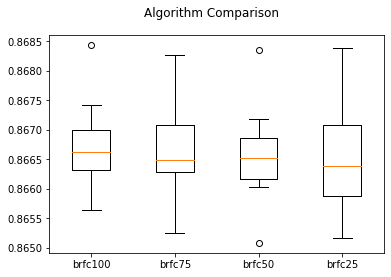

In [8]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# from explainerdashboard import ClassifierExplainer, ExplainerDashboard
# ExplainerDashboard(
#     ClassifierExplainer(
#         BalancedRandomForestClassifier().fit(X_train, y_train),
#         X_test, y_test
#     )
# ).run()

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of BalancedRandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...


In [ ]:
# ExplainerDashboard(explainer).run()